In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 15
plt.rcParams['figure.figsize'] = (7, 5)
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import os
os.chdir('/Users/jina/Downloads/h-and-m-personalized-fashion-recommendations')
pd.options.display.max_columns=None

In [2]:
transaction = pd.read_csv('transactions_train.csv') #학습 데이터(메타데이터로, 다른 데이터를 설명하는 데이터)
article = pd.read_csv('articles.csv') #거래 데이터
customer = pd.read_csv('customers.csv') #고객 데이터
sample = pd.read_csv('sample_submission.csv') #제출 샘플

1. customer

In [3]:
customer.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


In [4]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371980 entries, 0 to 1371979
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   customer_id             1371980 non-null  object 
 1   FN                      476930 non-null   float64
 2   Active                  464404 non-null   float64
 3   club_member_status      1365918 non-null  object 
 4   fashion_news_frequency  1355971 non-null  object 
 5   age                     1356119 non-null  float64
 6   postal_code             1371980 non-null  object 
dtypes: float64(3), object(4)
memory usage: 73.3+ MB


In [5]:
customer.shape[0] == customer['customer_id'].nunique()

True

In [6]:
# 구매이력 없는 고객
customer['customer_id'].nunique() - transaction['customer_id'].nunique()

9699

In [7]:
customer.isna().sum()

customer_id                    0
FN                        895050
Active                    907576
club_member_status          6062
fashion_news_frequency     16009
age                        15861
postal_code                    0
dtype: int64

In [8]:
customer.groupby('Active')['Active'].sum()

Active
1.0    464404.0
Name: Active, dtype: float64

In [9]:
customer.groupby('FN')['FN'].sum()

FN
1.0    476930.0
Name: FN, dtype: float64

In [10]:
customer['club_member_status'].value_counts()

ACTIVE        1272491
PRE-CREATE      92960
LEFT CLUB         467
Name: club_member_status, dtype: int64

In [11]:
customer['fashion_news_frequency'].value_counts()

NONE         877711
Regularly    477416
Monthly         842
None              2
Name: fashion_news_frequency, dtype: int64

In [12]:
customer['postal_code'].value_counts()

2c29ae653a9282cce4151bd87643c907644e09541abc28ae87dea0d1f6603b1c    120303
cc4ed85e30f4977dae47662ddc468cd2eec11472de6fac5ec985080fd92243c8       261
714976379549eb90aae4a71bca6c7402cc646ae7c40f6c1cb91d4b5a18623fc1       159
7c1fa3b0ec1d37ce2c3f34f63bd792f3b4494f324b6be5d1e4ba6a75456b96a7       157
5b7eb31eabebd3277de632b82267286d847fd5d44287ee150bb4206b48439145       156
                                                                     ...  
979fb998983e7fe8332eddaaef1bea3b1ebe9083570d2dac0dcaca6402cfc216         1
67e8b081c6eaa6687b81b43c383f8efa0b18c8e123bf5354ae511d2839650ba9         1
da0001a97343f376812f7574241b35d473d0dfe2c422d75c6d9410f528f26bc9         1
a5d6e2770ec2b5ba85ff46f0d4308f6eaa4986b92213fcb3062d29bcacd124a7         1
e94e26c3f01dbf1d685d4322f335887a2f522939e64844f73bb9d308ce858efa         1
Name: postal_code, Length: 352899, dtype: int64

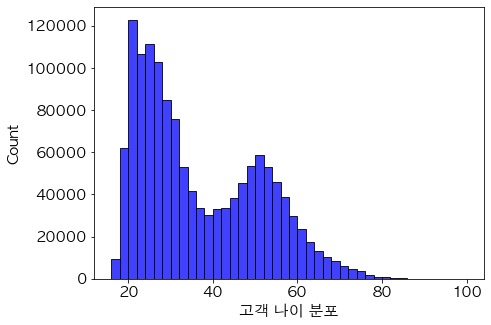

In [13]:
#sns.distplot(customer['age'])
ht = sns.histplot(data=customer, x='age', binwidth=2, color='blue')
ht.set_xlabel('고객 나이 분포')
plt.show()

2. transaction

In [18]:
print(transaction['t_dat'].max())
print(transaction['t_dat'].min())

2020-09-22
2018-09-20


3. article
- article_id: 거래별 id
- product_code, prod_name: 상품명과 매칭코드
- product_type_no, product_type_name: 상품 소분류와 매칭코드
- 'product_group_name': 상품 중분류
- 'graphical_appearance_no','graphical_appearance_name': 그래픽 그룹과 그룹명(아마도 image데이터와 연관)
- 'colour_group_code', 'colour_group_name': 색깔명과 매칭코드
- 'perceived_colour_value_id', 'perceived_colour_value_name','perceived_colour_master_id', 'perceived_colour_master_name'
- 'department_no', 'department_name': 부서명과 매칭코드 
- 'index_code', 'index_name','index_group_no', 'index_group_name':인덱스 변수
- 'section_no', 'section_name': 섹션명과 매칭코드
- 'garment_group_no', 'garment_group_name': 의상명과 매칭코드
- 'detail_desc': 자세한 설명

In [14]:
article.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,perceived_colour_value_id,perceived_colour_value_name,perceived_colour_master_id,perceived_colour_master_name,department_no,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,4,Dark,5,Black,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,3,Light,9,White,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,1,Dusty Light,9,White,1676,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,4,Dark,5,Black,1339,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,3,Light,9,White,1339,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [19]:
def nan_value(data):
  count = data.isnull().sum().sort_values(ascending=False)
  percent = (data.isnull().sum() / article.isnull().count()*100).sort_values(ascending = False)
  return pd.concat([count,percent], axis=1, keys=['count','percent']).head()
nan_value(article)

,count,percent
detail_desc,416,0.394156
perceived_colour_master_name,0,0.000000
garment_group_name,0,0.000000
garment_group_no,0,0.000000
section_name,0,0.000000


<BarContainer object of 19 artists>

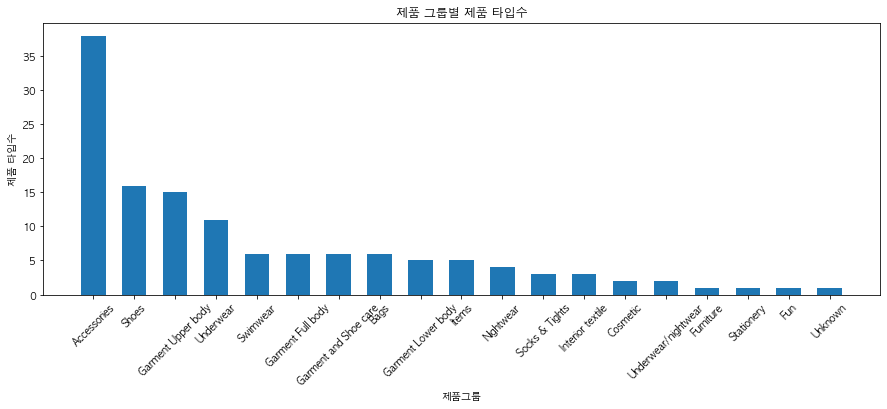

In [15]:
emp = article.groupby(["product_group_name"])["product_type_name"].nunique()
df = pd.DataFrame({'Product Group': emp.index,
                   'Product Types': emp.values})
df = df.sort_values(['Product Types'], ascending=False)

plt.rcParams['font.size'] = 10
plt.rcParams['figure.figsize'] = (15, 5)
plt.xticks(rotation=45)
plt.title('제품 그룹별 제품 타입수')
plt.xlabel('제품그룹')
plt.ylabel('제품 타입수')
plt.bar(df['Product Group'], df['Product Types'], width=0.6)

<BarContainer object of 19 artists>

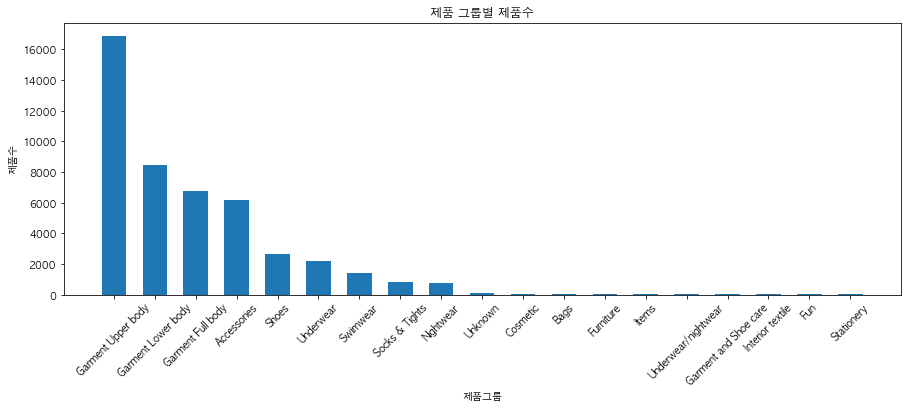

In [16]:
emp = article.groupby(["product_group_name"])["prod_name"].nunique()
df = pd.DataFrame({'Product Group': emp.index,
                   'Product Types': emp.values})
df = df.sort_values(['Product Types'], ascending=False)

plt.rcParams['font.size'] = 10
plt.rcParams['figure.figsize'] = (15, 5)
plt.xticks(rotation=45)
plt.title('제품 그룹별 제품수')
plt.xlabel('제품그룹')
plt.ylabel('제품수')
plt.bar(df['Product Group'], df['Product Types'], width=0.6)

 N주와 N-1주(+ N-2 + N-3)의 아이템 유사도 비교

In [17]:
for i in article.columns:
    print(i,':', len(article[i].unique()))


article_id : 105542
product_code : 47224
prod_name : 45875
product_type_no : 132
product_type_name : 131
product_group_name : 19
graphical_appearance_no : 30
graphical_appearance_name : 30
colour_group_code : 50
colour_group_name : 50
perceived_colour_value_id : 8
perceived_colour_value_name : 8
perceived_colour_master_id : 20
perceived_colour_master_name : 20
department_no : 299
department_name : 250
index_code : 10
index_name : 10
index_group_no : 5
index_group_name : 5
section_no : 57
section_name : 56
garment_group_no : 21
garment_group_name : 21
detail_desc : 43405
